In [212]:
%load_ext autoreload
%autoreload 2

import numpy as np
import math
import os
import pickle
import util.sync_pho_data_new as sp
import util.import_beh_data as di
import util.data_manipulation as dm
import util.import_photo_beh_path as pbd
import behaviour_fitting.likelihood as L
import scipy.optimize as opt
import util.Functions_photometry as fp
import matplotlib.pyplot as plt
import statsmodels.api as sm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
all_days = ['2021-11-06', '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12',
           '2021-11-13', '2021-11-15', '2021-11-16', 
           '2021-11-18','2021-11-19', '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23',
           '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29',
           '2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04', '2021-12-05',
           '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
           '2022-03-18', '2022-03-20', '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
           '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30',
           '2022-04-01', '2022-04-02', '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07',
           '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17',
           '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-25',
           '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29', '2022-04-30', '2022-05-02',
           '2022-05-03', '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-07', '2022-05-08',
           '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-14',
           '2022-05-15', '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20',
           '2022-05-21', '2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26', '2022-05-27',
           '2022-05-28', '2022-05-29', '2022-05-30', '2022-05-31', '2022-06-01',
           '2022-11-12', '2022-11-13', '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-18', '2022-11-19',
           '2022-11-20', '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-24', '2022-11-25', '2022-11-26',
           '2022-11-27', '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02', '2022-12-03',
           '2022-12-04', '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-12',
           '2022-12-13', '2022-12-14', '2022-12-15', '2022-12-16', '2022-12-17', '2022-12-18'] #days of recordings for all three cohorts

## Try one brain region of one dLight animal first

Fit behavioural model and get latent variables first. These uses ALL sessions from the animal.

In [3]:
mouse = ['7.7c'] # A7.7c in JC06

jc06 = dm.load_all_sessions(6)


Loading new data files..
Importing data file: A7.5b-2022-11-12-140835.txt
Importing data file: A7.5b-2022-11-13-124705.txt
Importing data file: A7.5b-2022-11-14-095402.txt
Importing data file: A7.5b-2022-11-15-100020.txt
Importing data file: A7.5b-2022-11-16-091814.txt
Importing data file: A7.5b-2022-11-18-092234.txt
Importing data file: A7.5b-2022-11-19-143917.txt
Importing data file: A7.5b-2022-11-21-091728.txt
Importing data file: A7.5b-2022-11-22-092008.txt
Importing data file: A7.5b-2022-11-23-092514.txt
Importing data file: A7.5b-2022-11-24-091828.txt
Importing data file: A7.5b-2022-11-25-090749.txt
Importing data file: A7.5b-2022-11-27-121335.txt
Importing data file: A7.5b-2022-11-28-091039.txt
Importing data file: A7.5b-2022-11-29-085113.txt
Importing data file: A7.5b-2022-11-30-085209.txt
Importing data file: A7.5b-2022-12-01-090814.txt
Importing data file: A7.5b-2022-12-02-105132.txt
Importing data file: A7.5b-2022-12-03-101102.txt
Importing data file: A7.5b-2022-12-04-100149

In [ ]:
ids = ['A7.7c']

In [4]:

# rw_results = {}

# for id in ids:

#     subject_sessions = jc06.get_sessions(subject_IDs=[id])

#     L_rw = lambda params: L.rw(subject_sessions[:], 0.57, *params)[0]
#     fit = opt.differential_evolution(L_rw, ((0,1), (0,10)))

#     print(id)
#     print(fit)

#     rw_results[id] = fit


c:\Users\some5114\code\cost_benefit\behaviour_fitting\likelihood.py:53: RuntimeWarning: divide by zero encountered in log
  L += -np.log(p)


A7.7c
     fun: 973.6866919755415
     jac: array([ 0.00204636, -0.00061391])
 message: 'Optimization terminated successfully.'
    nfev: 504
     nit: 15
 success: True
       x: array([0.01447491, 0.34893105])


In [6]:
# rw_result_a77c = rw_results

# with open('results/rw_result_a77c', 'wb') as f:
#     pickle.dump(rw_result_a77c, f)

In [ ]:
with open('results/rw_result_a77c', 'rb') as f:
    rw_result_a77c = pickle.load(f)

In [161]:
subject_sessions = jc06.get_sessions(subject_IDs=ids)
latents = L.rw(subject_sessions, 0.57, *rw_result_a77c['A7.7c'].x)

Get all paths to behavioural and photometry files of DESIRED sessions.

In [250]:
dir_beh = '../../OneDrive - Nexus365/Data/Basal_Ganglia_Cost_Benefit/Data/ThreeChoice_Task/JC06_ThreeChoice_A2a_Drd1/Photometry/Behaviour'
dir_pho = '../../OneDrive - Nexus365/Data/Basal_Ganglia_Cost_Benefit/Data/ThreeChoice_Task/JC06_ThreeChoice_A2a_Drd1/Photometry/Recordings'

start_str = 'A'

region = ['DLS'] # Look at DLS first, which is first 15 sessions for A7.7c

all_beh_path, all_pho_path = pbd.import_sessions_photometry_path(
    dir_beh,
    dir_pho,
    start_str,
    sessions_format='A{id}-{datetime}.txt',
    photometry_format='A{id}_{region}_{hemisphere}-{datetime}.ppd',
    mouse=mouse,
    day=all_days,
    training='all',
    region=region,
    hemisphere=[]
)

['A7.7c_DLS_R-2022-11-13-131013.ppd', 'A7.7c_DLS_R-2022-11-15-113839.ppd', 'A7.7c_DLS_R-2022-11-18-110625.ppd', 'A7.7c_DLS_R-2022-11-19-162110.ppd', 'A7.7c_DLS_R-2022-11-22-110101.ppd', 'A7.7c_DLS_R-2022-11-24-105518.ppd', 'A7.7c_DLS_R-2022-11-27-134308.ppd', 'A7.7c_DLS_R-2022-11-29-120323.ppd', 'A7.7c_DLS_R-2022-12-01-132118.ppd', 'A7.7c_DLS_R-2022-12-03-115140.ppd', 'A7.7c_DLS_R-2022-12-06-104327.ppd', 'A7.7c_DLS_R-2022-12-08-102903.ppd', 'A7.7c_DLS_R-2022-12-12-175620.ppd', 'A7.7c_DLS_R-2022-12-14-123724.ppd', 'A7.7c_DLS_R-2022-12-16-103331.ppd']
['A7.7c-2022-11-13-131036.txt', 'A7.7c-2022-11-15-113908.txt', 'A7.7c-2022-11-18-110651.txt', 'A7.7c-2022-11-19-162137.txt', 'A7.7c-2022-11-22-110122.txt', 'A7.7c-2022-11-24-105546.txt', 'A7.7c-2022-11-27-134339.txt', 'A7.7c-2022-11-29-120354.txt', 'A7.7c-2022-12-01-132142.txt', 'A7.7c-2022-12-03-115205.txt', 'A7.7c-2022-12-06-104355.txt', 'A7.7c-2022-12-08-102925.txt', 'A7.7c-2022-12-12-175700.txt', 'A7.7c-2022-12-14-123758.txt', 'A7.7c-20

Locate these sessions within a list of all sessions of the animal, so to find the needed latent variables for regression later.

In [251]:
all_beh_path_all_regions, all_pho_path_all_regions = pbd.import_sessions_photometry_path(
    dir_beh,
    dir_pho,
    start_str,
    sessions_format='A{id}-{datetime}.txt',
    photometry_format='A{id}_{region}_{hemisphere}-{datetime}.ppd',
    mouse=mouse,
    day=all_days,
    training='all',
    region=[],
    hemisphere=[]
)

indices_used_sessions = [all_beh_path_all_regions.index(x) for x in all_beh_path]

['A7.7c_DMS_L-2022-11-12-150640.ppd', 'A7.7c_DLS_R-2022-11-13-131013.ppd', 'A7.7c_DMS_L-2022-11-14-113455.ppd', 'A7.7c_DLS_R-2022-11-15-113839.ppd', 'A7.7c_DMS_L-2022-11-16-105918.ppd', 'A7.7c_DLS_R-2022-11-18-110625.ppd', 'A7.7c_DLS_R-2022-11-19-162110.ppd', 'A7.7c_DMS_L-2022-11-21-105445.ppd', 'A7.7c_DLS_R-2022-11-22-110101.ppd', 'A7.7c_DMS_L-2022-11-23-110438.ppd', 'A7.7c_DLS_R-2022-11-24-105518.ppd', 'A7.7c_DMS_L-2022-11-25-105005.ppd', 'A7.7c_DLS_R-2022-11-27-134308.ppd', 'A7.7c_DMS_L-2022-11-28-105131.ppd', 'A7.7c_DLS_R-2022-11-29-120323.ppd', 'A7.7c_DMS_L-2022-11-30-103548.ppd', 'A7.7c_DLS_R-2022-12-01-132118.ppd', 'A7.7c_DMS_L-2022-12-02-090838.ppd', 'A7.7c_DLS_R-2022-12-03-115140.ppd', 'A7.7c_DMS_L-2022-12-04-113131.ppd', 'A7.7c_DMS_L-2022-12-05-103050.ppd', 'A7.7c_DLS_R-2022-12-06-104327.ppd', 'A7.7c_DMS_L-2022-12-07-105221.ppd', 'A7.7c_DLS_R-2022-12-08-102903.ppd', 'A7.7c_DMS_L-2022-12-09-121520.ppd', 'A7.7c_DLS_R-2022-12-12-175620.ppd', 'A7.7c_DMS_L-2022-12-13-134109.ppd', 

In [252]:
indices_used_sessions

[1, 3, 5, 6, 8, 10, 12, 14, 16, 18, 21, 23, 25, 27, 29]

In [253]:
rpe_relevant_sessions = [latents[3][x] for x in indices_used_sessions]

In [254]:
sessions = [di.Session(s_path) for s_path in all_beh_path]

all_photo_data, all_sample_times_pho, all_sample_times_pyc, all_corrected_signal = zip(*[sp.sync_photometry_data(p_path, 'A{id}_{region}_{hemisphere}', session, low_pass=5, high_pass=0.001)
        for p_path, session in zip(all_pho_path, sessions)])

Importing data file: A7.7c-2022-11-13-131036.txt
Importing data file: A7.7c-2022-11-15-113908.txt
Importing data file: A7.7c-2022-11-18-110651.txt
Importing data file: A7.7c-2022-11-19-162137.txt
Importing data file: A7.7c-2022-11-22-110122.txt
Importing data file: A7.7c-2022-11-24-105546.txt
Importing data file: A7.7c-2022-11-27-134339.txt
Importing data file: A7.7c-2022-11-29-120354.txt
Importing data file: A7.7c-2022-12-01-132142.txt
Importing data file: A7.7c-2022-12-03-115205.txt
Importing data file: A7.7c-2022-12-06-104355.txt
Importing data file: A7.7c-2022-12-08-102925.txt
Importing data file: A7.7c-2022-12-12-175700.txt
Importing data file: A7.7c-2022-12-14-123758.txt
Importing data file: A7.7c-2022-12-16-103358.txt
7.7c 2022-11-13 13:10:13
7.7c 2022-11-15 11:38:39
7.7c 2022-11-18 11:06:25
7.7c 2022-11-19 16:21:10
7.7c 2022-11-22 11:01:01
7.7c 2022-11-24 10:55:18
7.7c 2022-11-27 13:43:08
7.7c 2022-11-29 12:03:23
7.7c 2022-12-01 13:21:18
7.7c 2022-12-03 11:51:40
7.7c 2022-12-06

Light intensity corrected for decay through sessions in `all_corrected_signal`. Still in volts.

Sample times and signal levels. Sample times on full session timescales, not divided by trials.

In [255]:
# t_scale, pho_scale, trials_to_keep_ids, trials_discarded_ids, scale_latency = fp.split_data_per_trial(sessions, all_sample_times_pyc, all_corrected_signal, trial_type='all',
#                                         time_start=-500, time_end=1000)

In [256]:
# t_scale_whole, pho_scale_together, v_line = fp.join_trial_scaling_t_pho_scale(t_scale, pho_scale)

In [257]:
t_scale_whole, v_line, trials_to_keep_ids, z_score_signal, scale_latency = fp.get_scaled_photometry_per_trial(sessions, all_sample_times_pyc,
                                                                                           all_corrected_signal, -500, 1000) 

# -500: starting 500 ms before init.
# 1000: ending 1000 ms after cue.

scaled session 0
scaled session 1
scaled session 2
scaled session 3
scaled session 4
scaled session 5
scaled session 6
scaled session 7
scaled session 8
scaled session 9
scaled session 10
scaled session 11
scaled session 12
scaled session 13
scaled session 14
scaled session 0
scaled session 1
scaled session 2
scaled session 3
scaled session 4
scaled session 5
scaled session 6
scaled session 7
scaled session 8
scaled session 9
scaled session 10
scaled session 11
scaled session 12
scaled session 13
scaled session 14
scaled session 0
scaled session 1
scaled session 2
scaled session 3
scaled session 4
scaled session 5
scaled session 6
scaled session 7
scaled session 8
scaled session 9
scaled session 10
scaled session 11
scaled session 12
scaled session 13
scaled session 14
scaled session 0
scaled session 1
scaled session 2
scaled session 3
scaled session 4
scaled session 5
scaled session 6
scaled session 7
scaled session 8
scaled session 9
scaled session 10
scaled session 11
scaled session

`z_score_signal` seems to contain the processed and warped activity signal to be used. 

Variable format: lists (z-scores at each time point within a trial) in lists (trials in a session) in list (sessions). 

`pho_scale_together` has same format.

`t_scale_whole` is the timescale for each trail in ms.

Only time period in between 'go' and 'poke' varies, and this is warped to match the median of all trials in used data.


In [258]:
v_line

[500.0, 1001.0, 1512.0, 2512.0]

`v_line`: init, go, poke, cue. Outcome (O) at cue + 500 ms.

In [259]:
after_cue_activity_list = []
cue_to_reward_activity_list = []
after_reward_activity_list = []
rpe_good_trials_joined = []

cue_time_index = np.where(t_scale_whole == v_line[3])[0][1]
reward_time_index = cue_time_index + int(0.5 * (len(t_scale_whole) - cue_time_index))

for sesh_id, sesh in enumerate(trials_to_keep_ids):

    for trial_id in sesh:

        after_cue_activity = sum(z_score_signal[sesh_id][trial_id][cue_time_index:])
        cue_to_reward_activity = sum(z_score_signal[sesh_id][trial_id][cue_time_index : reward_time_index])
        after_reward_activity = sum(z_score_signal[sesh_id][trial_id][reward_time_index:])

        after_cue_activity_list.append(after_cue_activity)
        cue_to_reward_activity_list.append(cue_to_reward_activity)
        after_reward_activity_list.append(after_reward_activity)
        rpe_good_trials_joined.append(rpe_relevant_sessions[sesh_id][trial_id])




In [260]:
linear_model = sm.regression.linear_model.OLS(cue_to_reward_activity_list, sm.tools.tools.add_constant(rpe_good_trials_joined))
fit_results = linear_model.fit()
fit_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     659.8
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          4.11e-128
Time:                        15:38:30   Log-Likelihood:                -11882.
No. Observations:                2297   AIC:                         2.377e+04
Df Residuals:                    2295   BIC:                         2.378e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2836      0.891      3.685      0.000       1.536       5.031
x1            61.7758      2.405     25.687      0.000      57.060      66.492
==============================================================================
Omnibus:                       64.655   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.315
Skew:                           0.297   Prob(JB):                     1.48e-20
Kurtosis:                       3.775   Cond. No.                         2.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

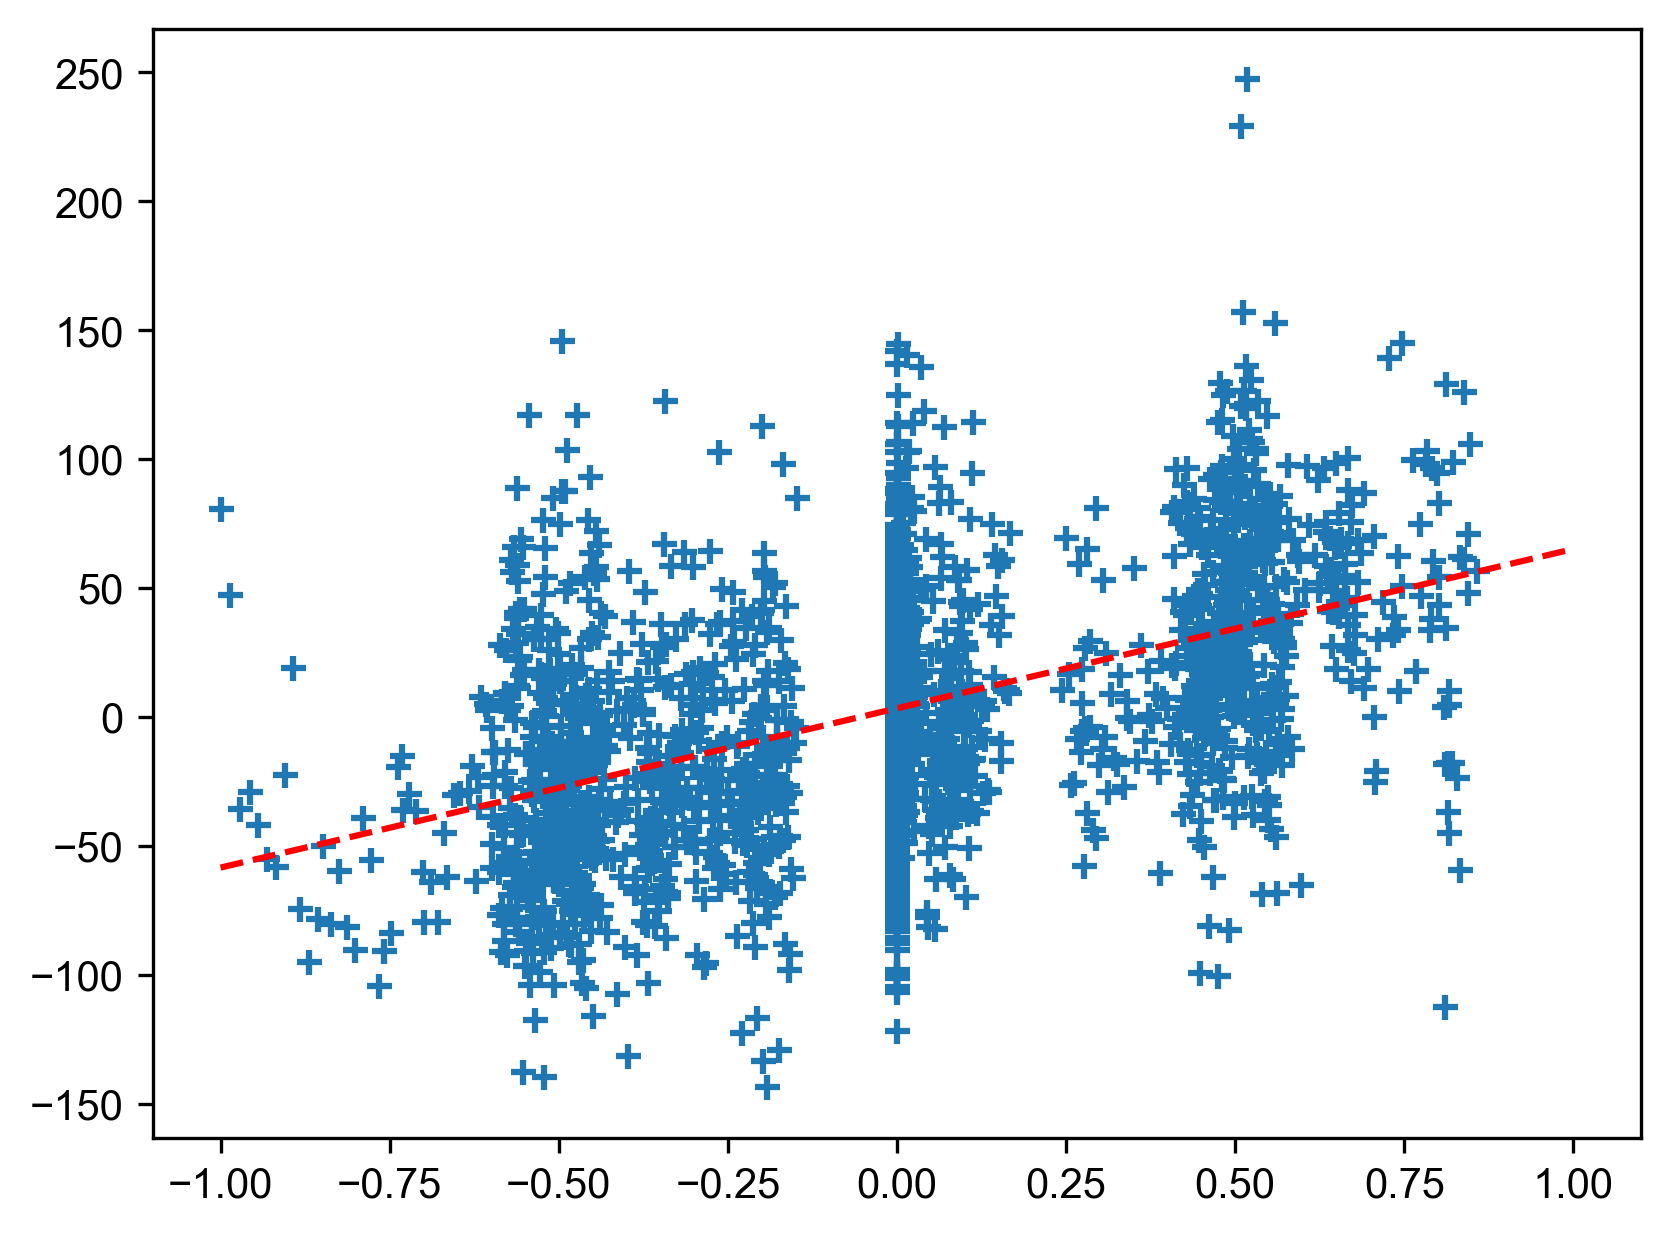

In [261]:
plt.scatter(rpe_good_trials_joined, cue_to_reward_activity_list, marker='+')
plt.plot([-1, 1], fit_results.params[0] + fit_results.params[1] * np.array([-1, 1]), 'r--')

['7.7c']
[<util.import_beh_data.Session object at 0x000001BA0DB416D0>, <util.import_beh_data.Session object at 0x000001BA0DB41D00>, <util.import_beh_data.Session object at 0x000001BA0CC18040>, <util.import_beh_data.Session object at 0x000001BA0DB41B50>, <util.import_beh_data.Session object at 0x000001BA9F898B50>, <util.import_beh_data.Session object at 0x000001BA0D9007F0>, <util.import_beh_data.Session object at 0x000001BA14F48A90>, <util.import_beh_data.Session object at 0x000001BA0D99BFD0>, <util.import_beh_data.Session object at 0x000001BA0D86FD00>, <util.import_beh_data.Session object at 0x000001BA0D8E6340>, <util.import_beh_data.Session object at 0x000001BA0DA8DC70>, <util.import_beh_data.Session object at 0x000001BA0DB41850>, <util.import_beh_data.Session object at 0x000001BA59494E20>, <util.import_beh_data.Session object at 0x000001BA2AB11400>, <util.import_beh_data.Session object at 0x000001BA087F0640>]
['DLS', 'DLS', 'DLS', 'DLS', 'DLS', 'DLS', 'DLS', 'DLS', 'DLS', 'DLS', 'DLS

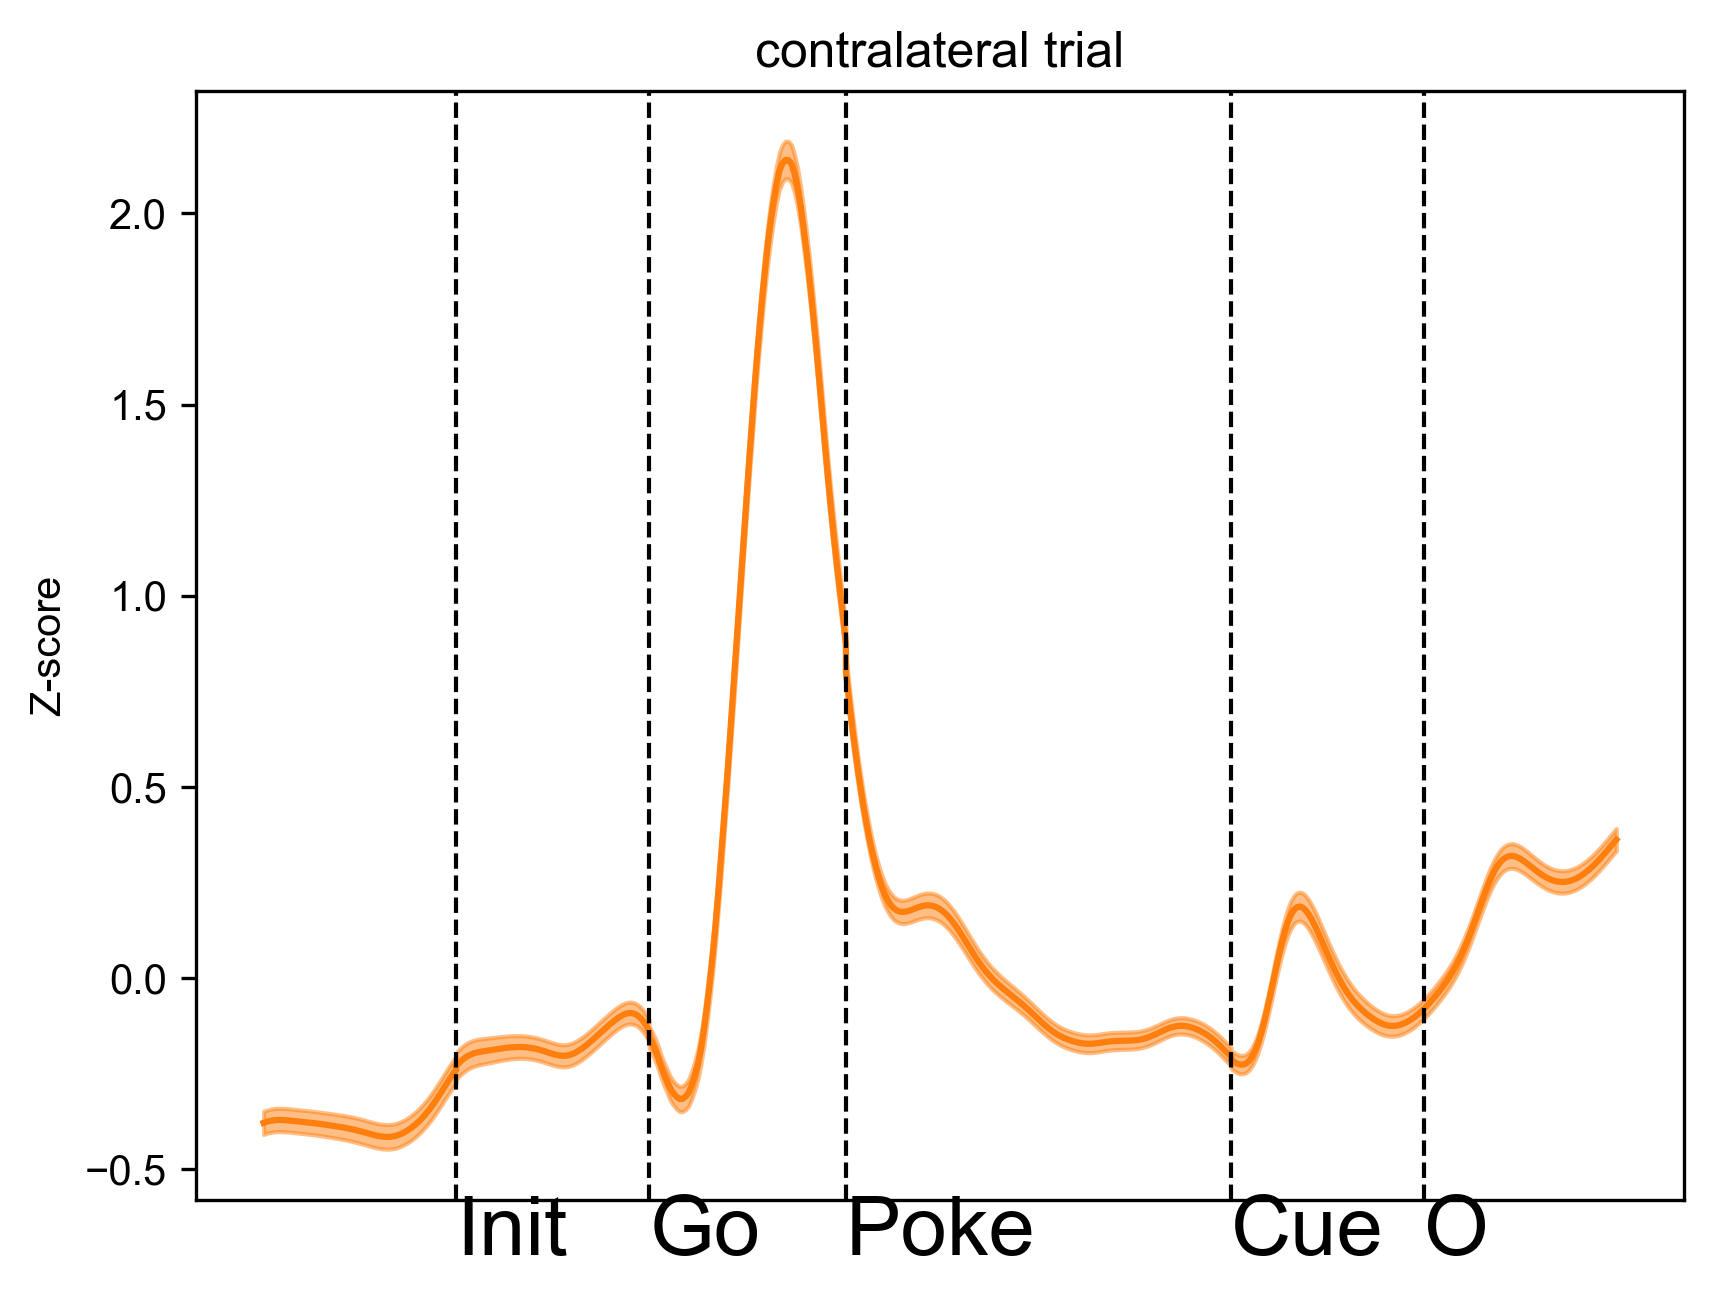

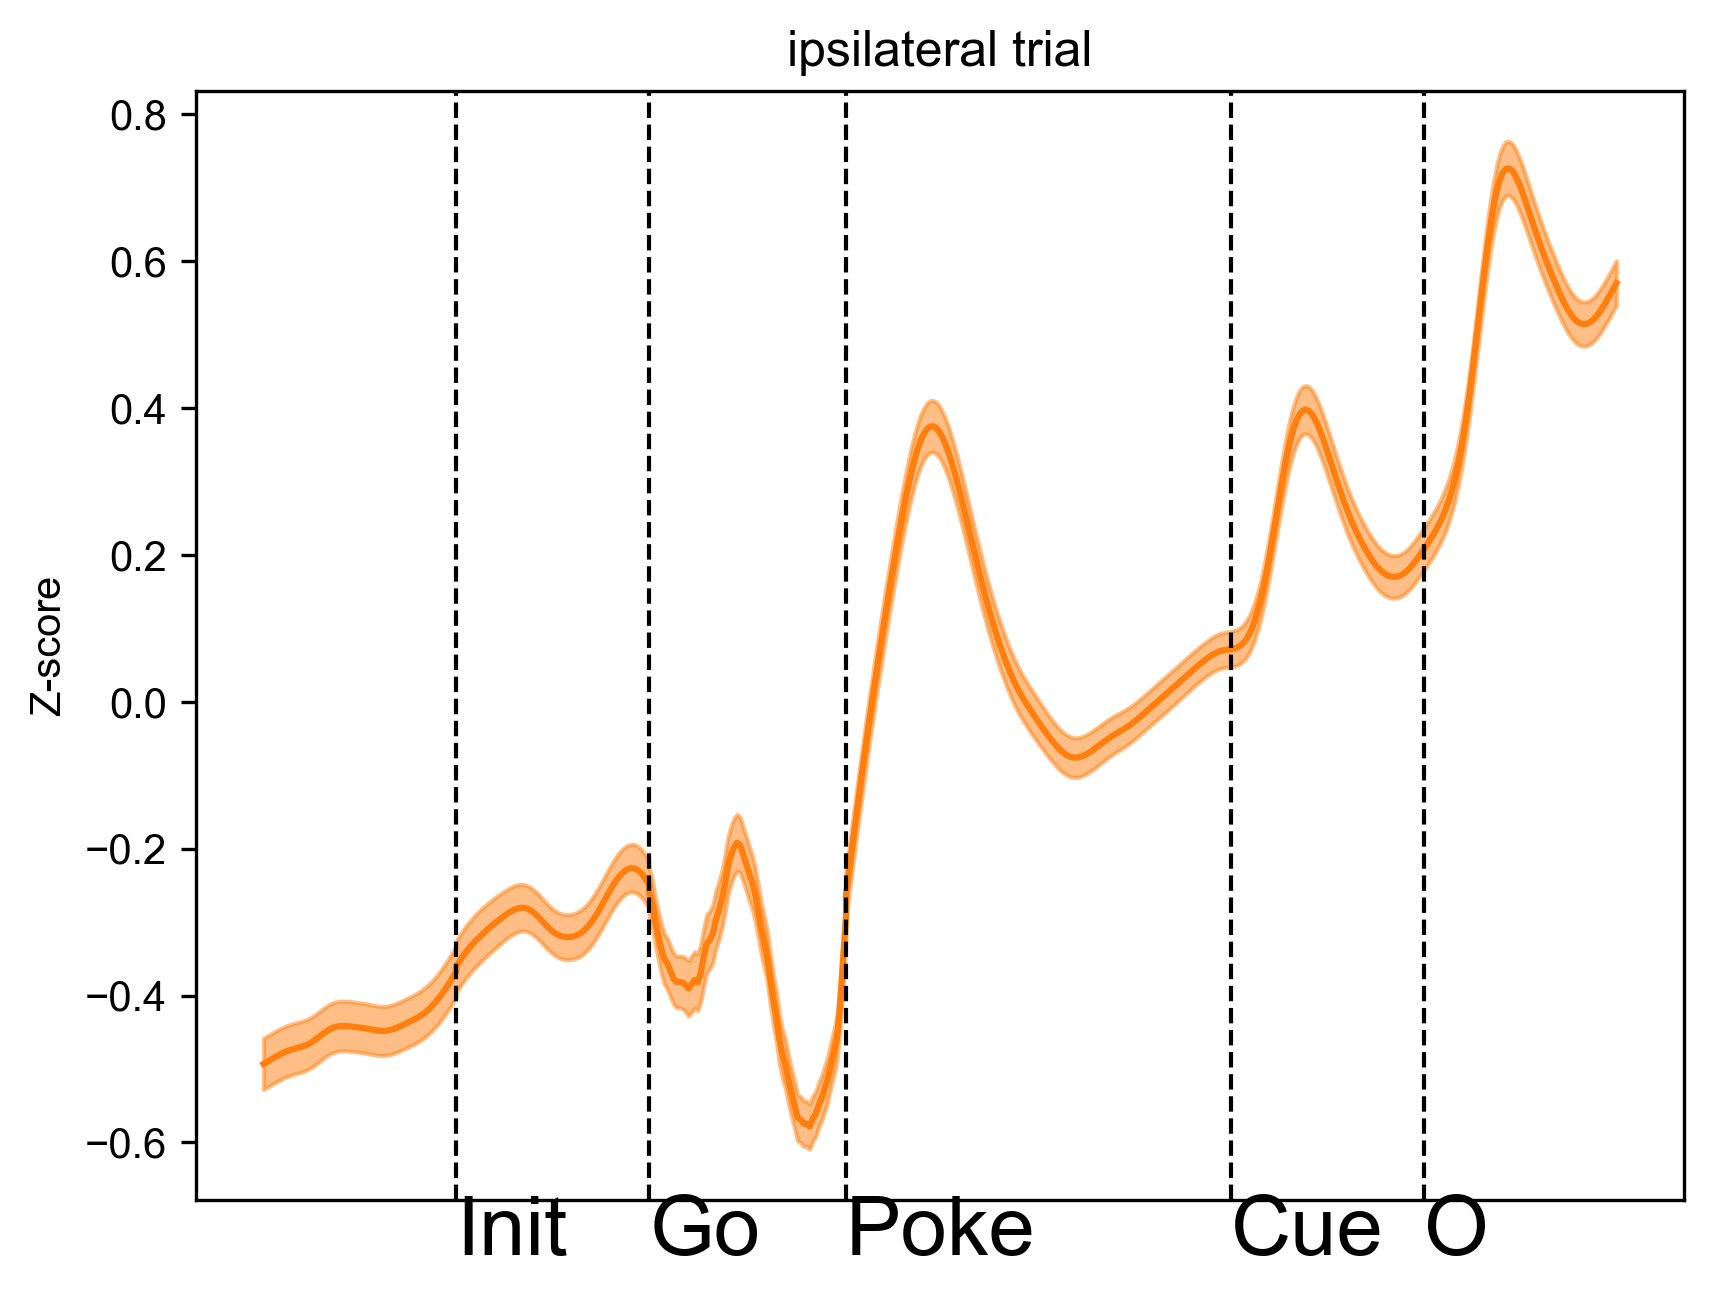

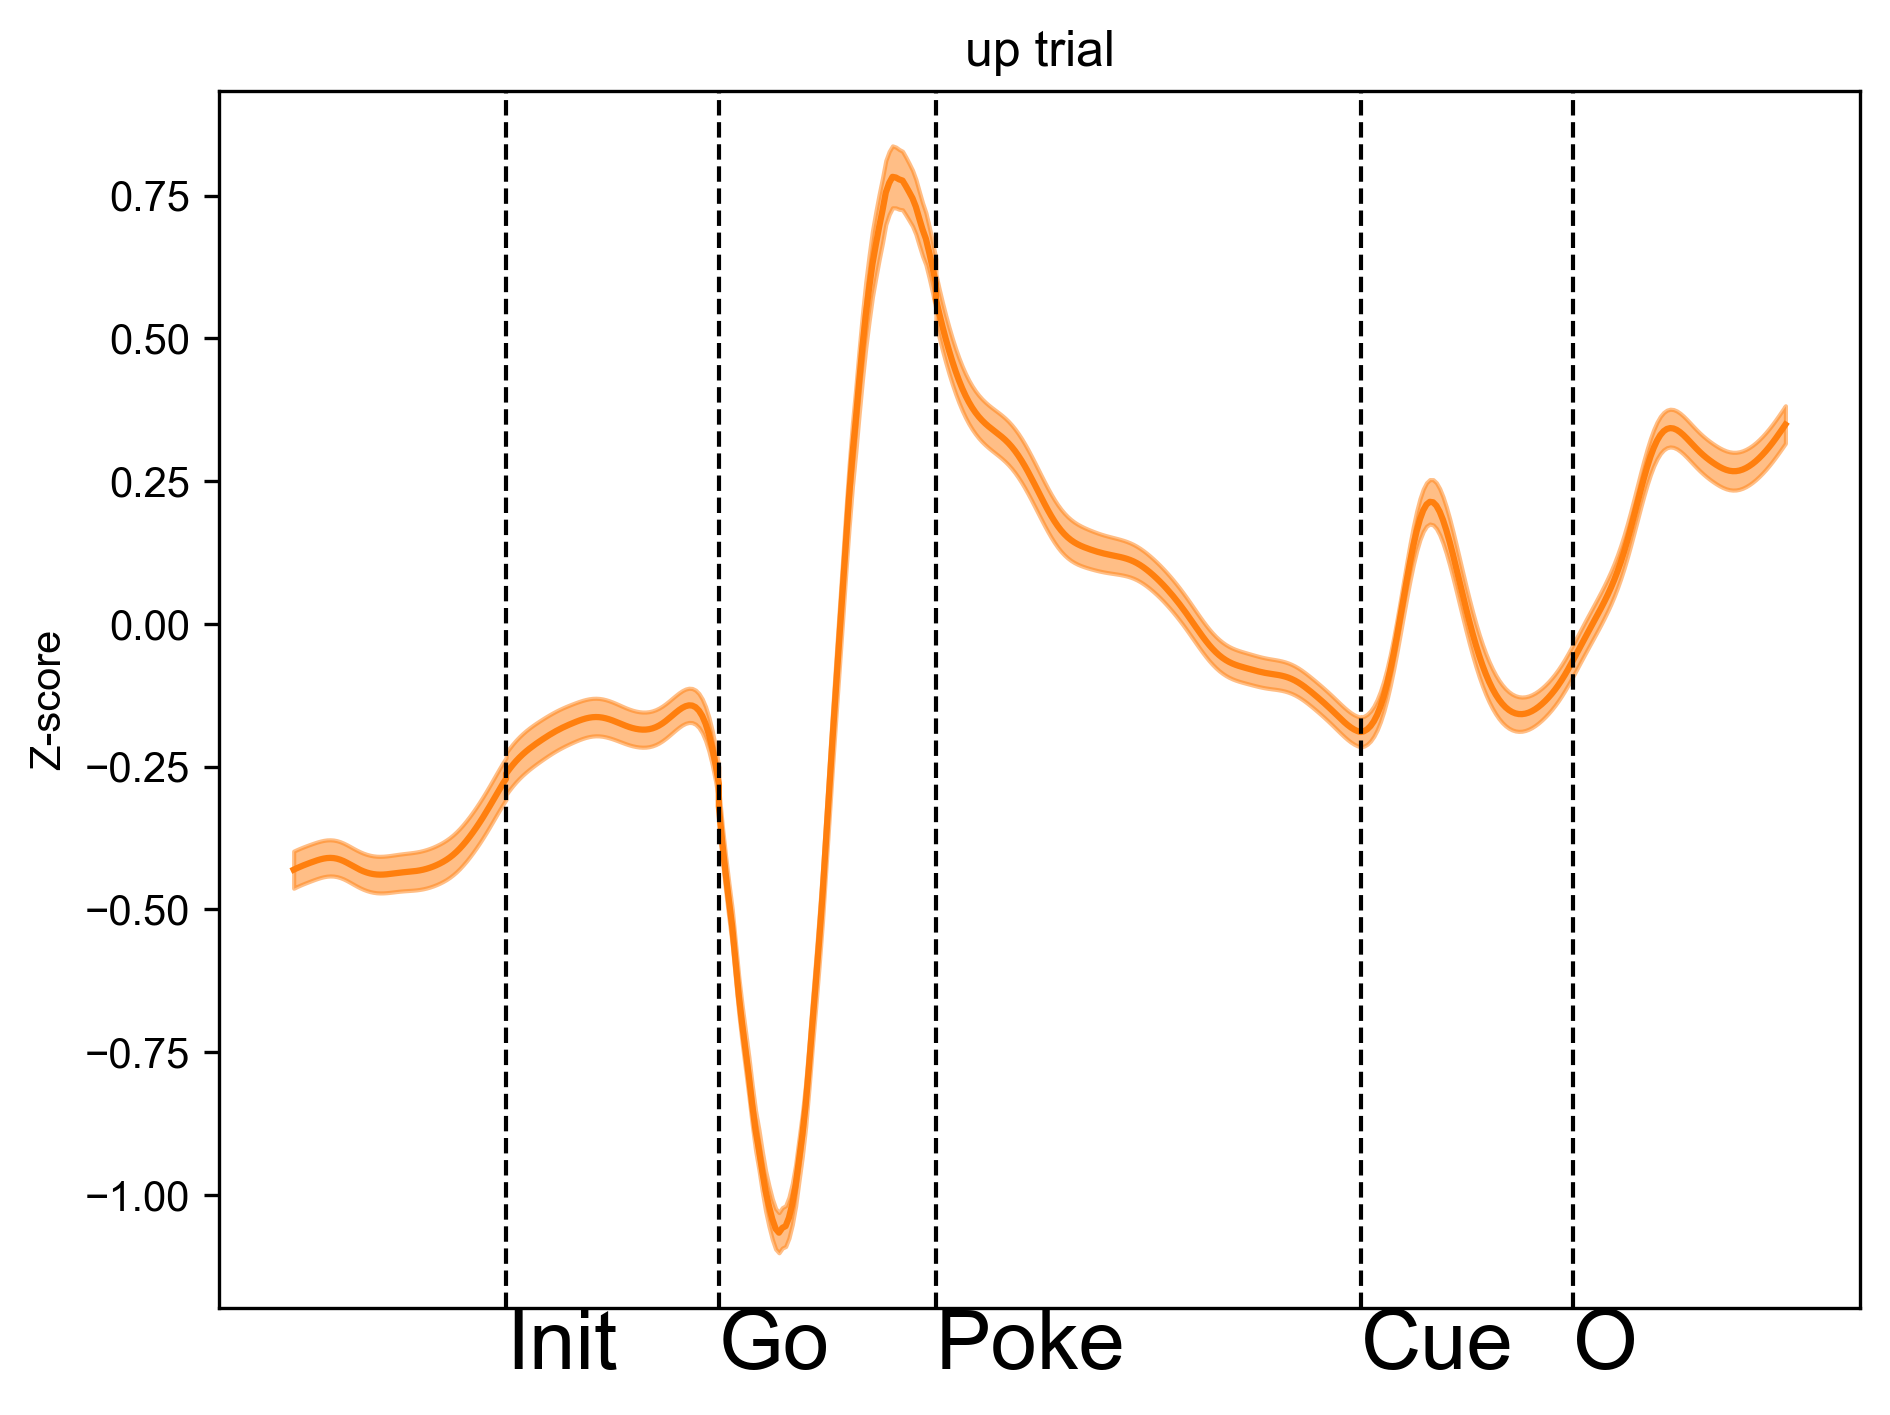

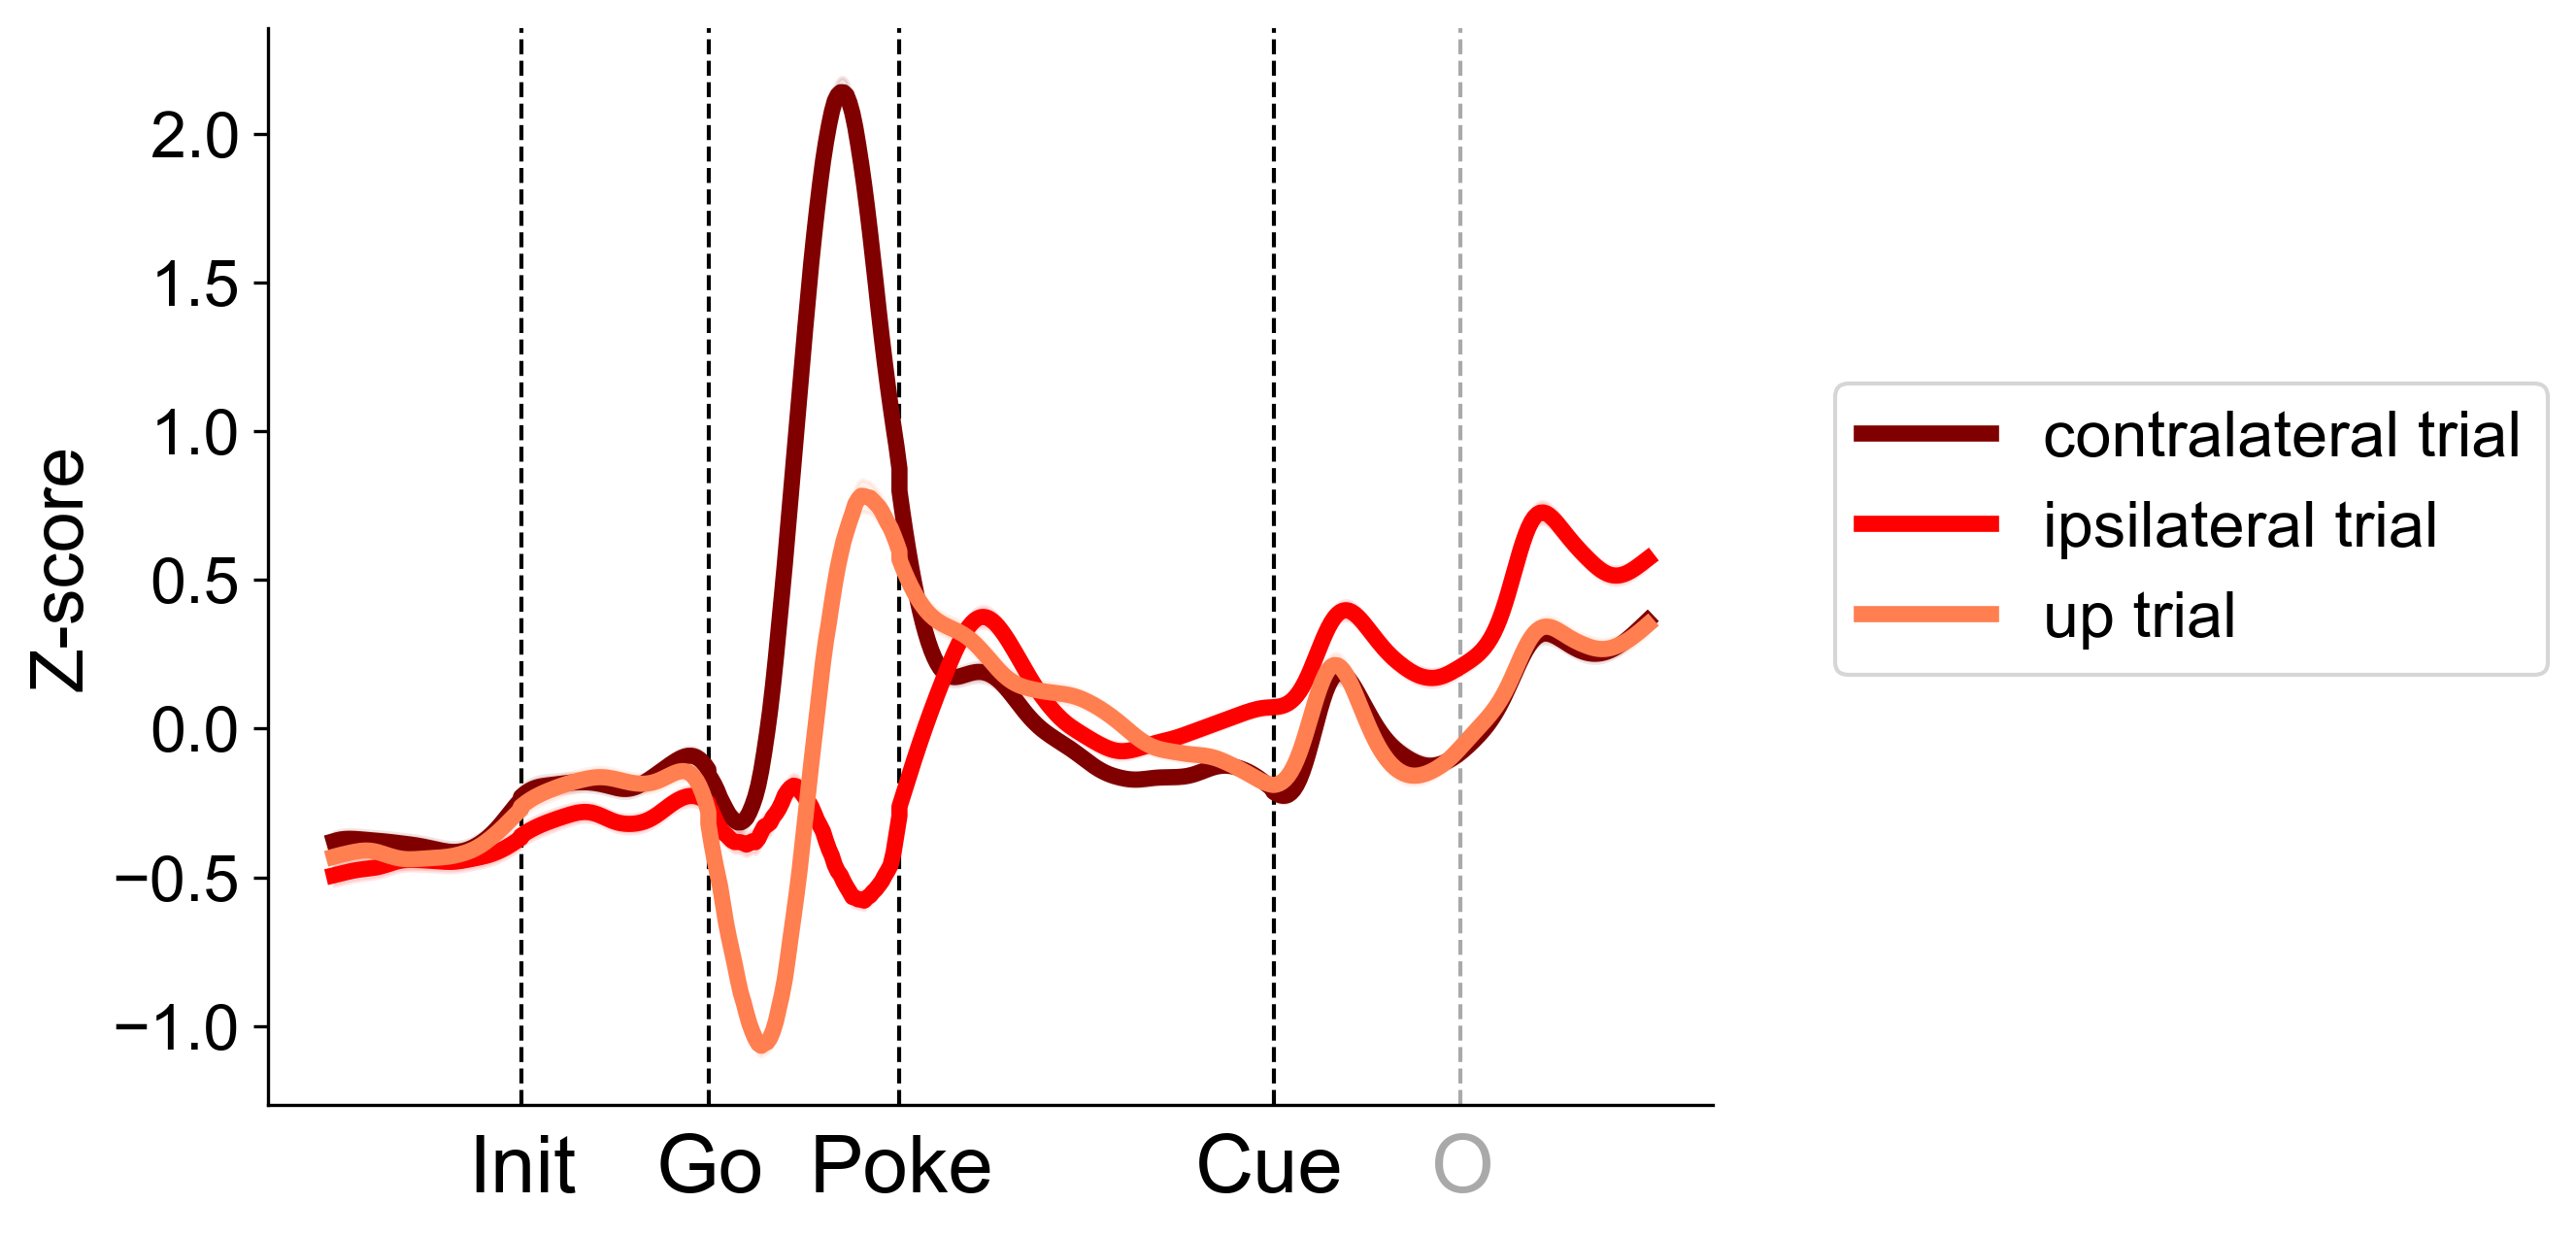

In [262]:
all_trial_type = [['contralateral trial', 'ipsilateral trial', 'up trial']]
#all_trial_type = [['contralateral trial', 'ipsilateral trial', 'up trial'], ['trial_100', 'trial_50', 'trial_20'],
#                   ['trial_100_forced', 'trial_50_forced', 'trial_20_forced'], ['trial_100_free', 'trial_50_free', 'trial_20_free'],
#                   ['trial_100', 'trial_50_rew', 'trial_20_rew'], ['trial_100', 'trial_50_nonrew', 'trial_20_nonrew'],
#                   ['contra_100', 'contra_50', 'contra_20'], ['ipsi_100', 'ipsi_50', 'ipsi_20'], ['up_100', 'up_50', 'up_20'],
#                   ['contra_100_forced', 'contra_50_forced', 'contra_20_forced'], ['contra_100_free', 'contra_50_free', 'contra_20_free'],
#                   ['ipsi_100_forced', 'ipsi_50_forced', 'ipsi_20_forced'], ['ipsi_100_free', 'ipsi_50_free', 'ipsi_20_free'],
#                   ['up_100_forced', 'up_50_forced', 'up_20_forced'], ['up_100_free', 'up_50_free', 'up_20_free']]


#line to plot z_scored photometry signals for the different trial types
fp.plot_photometry(sessions, all_photo_data, z_score_signal, t_scale_whole, v_line, trials_to_keep_ids, all_trial_type, start_str, -500, 1000)